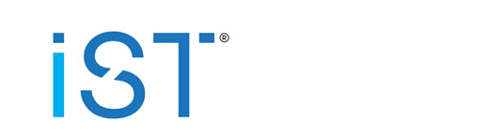

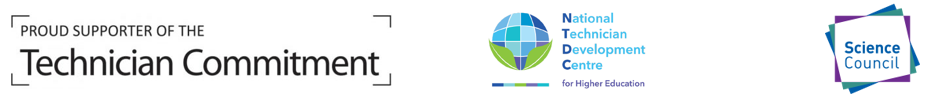

## **INTRODUCTION TO PYTHON- Jupyter Notebook**
*Kanupriya Bhargava*


<div class="alert alert-block alert-info"> <b>What is the Jupyter Notebook?</b> <br> - Open Source web application <br> - Create documnets with code, visualisations, text <br> - Can be used for data cleaning, transformations, analysis <br> - Statistical modelling, machine learning <br> </div>

<b>Some useful links</b> <br>
Installing Anaconda: https://docs.anaconda.com/anaconda/install/windows/ <br> Getting started with Jupyter Notebook</b>: https://www.dataquest.io/blog/jupyter-notebook-tutorial/ </div>

## 1. Insurance Data

<b> This dataset of 1338 policy holders includes a set of characteristics (Age, Gender, BMI, etc.) for each individual against their individual health insurance premiums.</b> <br><br> *Link to the dataset:* https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset

### Exposure Measure in Insurance

- In insurance, <b>exposure</b> refers to an individual's susceptibility to various losses or risks they might encounter
- The greater the <b>exposure</b> is to potential losses, the higher the premiums will be as the insurer needs to charge more to be profitable
- The insurers will evaluate the <b>exposure</b> in order to work out the level of risk they face and premium they must charge in order to profitably write the business.

The characteristics of the policy holders can be used as <b> exposure measures </b> <br> We will now analyse the data to elvauate these exposure measures.   

## 2. Exploratory Data Analysis

### 2.1 Loading Required Libraries

In [2]:
#Importing the required libraries 
import pandas as pd #for data processing 
import seaborn as sns
import plotly.express as px #for visualisation

*A guide to the libraries* <br> 
Pandas:https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html <br>
Seaborn: https://seaborn.pydata.org/ <br>
Plotly: https://plotly.com/python/basic-charts/


### 2.2 Reading the Dataset

In [3]:
#We will store the data values in the data frame called df 
df = pd.read_csv("C:/Users/kanup/Desktop/Projects/Kaggle/insurance_data.csv")

#Dimensions of the data
df.shape

(1338, 7)

In [4]:
#View the datatype of the variables in our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
Age          1338 non-null int64
Gender       1338 non-null object
BMI          1338 non-null float64
#children    1338 non-null int64
Smoker       1338 non-null object
Region       1338 non-null object
Premium      1338 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 73.2+ KB


In [156]:
#First 10 rows of the data 
df.head(10)

Age  Gender     BMI  #children Smoker     Region  Premium
0   19  female  27.900          0    yes  southwest    16885
1   18    male  33.770          1     no  southeast     1726
2   28    male  33.000          3     no  southeast     4449
3   33    male  22.705          0     no  northwest    21984
4   32    male  28.880          0     no  northwest     3867
5   31  female  25.740          0     no  southeast     3757
6   46  female  33.440          1     no  southeast     8241
7   37  female  27.740          3     no  northwest     7282
8   37    male  29.830          2     no  northeast     6406
9   60  female  25.840          0     no  northwest    28923

In [5]:
#Sorting rows
df2 = df.sort_values(by=["Premium"],ascending=False)
df2.head(5)

Age  Gender     BMI  #children Smoker     Region  Premium
543    54  female  47.410          0    yes  southeast    63770
1300   45    male  30.360          0    yes  southeast    62593
1230   52    male  34.485          3    yes  northwest    60021
577    31  female  38.095          1    yes  northeast    58571
819    33  female  35.530          0    yes  northwest    55135

In [6]:
#Selecting rows based on a condition
data = df[(df["Smoker"]=="yes")&(df["BMI"]>30)]
data.head(5)

Age  Gender    BMI  #children Smoker     Region  Premium
14   27    male  42.13          0    yes  southeast    39612
19   30    male  35.30          0    yes  southwest    36837
23   34  female  31.92          1    yes  northeast    37702
29   31    male  36.30          2    yes  southwest    38711
30   22    male  35.60          0    yes  southwest    35586

In [7]:
display(df.describe().round(2)) #a statistical summary of the data 

Age      BMI  #children   Premium
count  1338.00  1338.00    1338.00   1338.00
mean     39.21    30.66       1.09  13270.41
std      14.05     6.10       1.21  12110.01
min      18.00    15.96       0.00   1122.00
25%      27.00    26.30       0.00   4740.00
50%      39.00    30.40       1.00   9382.00
75%      51.00    34.69       2.00  16640.00
max      64.00    53.13       5.00  63770.00

### 2.3 Visualisations

#### 1. *Premium*

We start by looking at the main variable of interest- the *Premium*

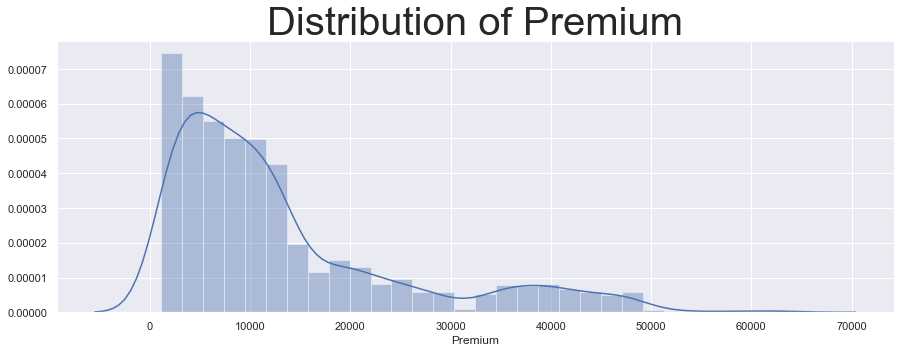

In [8]:
#Distribution of the Premium
sns.set(rc={'figure.figsize':(15,5)})
sns_plot = sns.distplot(df["Premium"]).set_title("Distribution of Premium",fontsize=40)

In [9]:
#Histogram of the Premium
fig = px.histogram(df, x="Premium", nbins=20,title="Histogram of Premium")
fig.show()

#### 2. *Gender*

In [10]:
fig = px.histogram(df, x="Gender",title="Count of Gender")
fig.show()

#### 3.Smoker

In [20]:
fig = px.histogram(df, x="Smoker",color= "Smoker",title="Count of Smoker")
fig.show()

#### 4.Region

In [164]:
fig = px.histogram(df, x="Region",color="Region",title="Count of Region")
fig.show()

#### 5. Combination of the variables

In [165]:
fig = px.histogram(df, x="Gender",color= "Smoker",title="Count of Gender (by Smoker)")
fig.show()

In [96]:
fig = px.histogram(df, x="Region",color= "Gender", title= "Count of Region (by Gender)")
fig.show()

In [27]:
fig = px.histogram(df, x="Region", y="Premium", color = "Gender", title="Premium by Region")
fig.show()

In [97]:
fig = px.histogram(df, x="Region",color= "Gender", pattern_shape="Smoker", title= "Count of Region (by Gender & Smoker)")
fig.show()

#### 6. Multi-variate Analysis

In [32]:
#Scatter plot 1
fig = px.scatter(df, x="Age", y="Premium", color="Smoker",size= "BMI",hover_data=['#children'],title="Premium vs Age")
fig

In [33]:
#Scatter plot 2
fig = px.scatter(df, x="#children", y="Premium", color="Smoker",size= "Age",hover_data=['#children'],title="Premium vs #childern")
fig

Text(0.5, 1.08, 'Scatterplot Matrix')

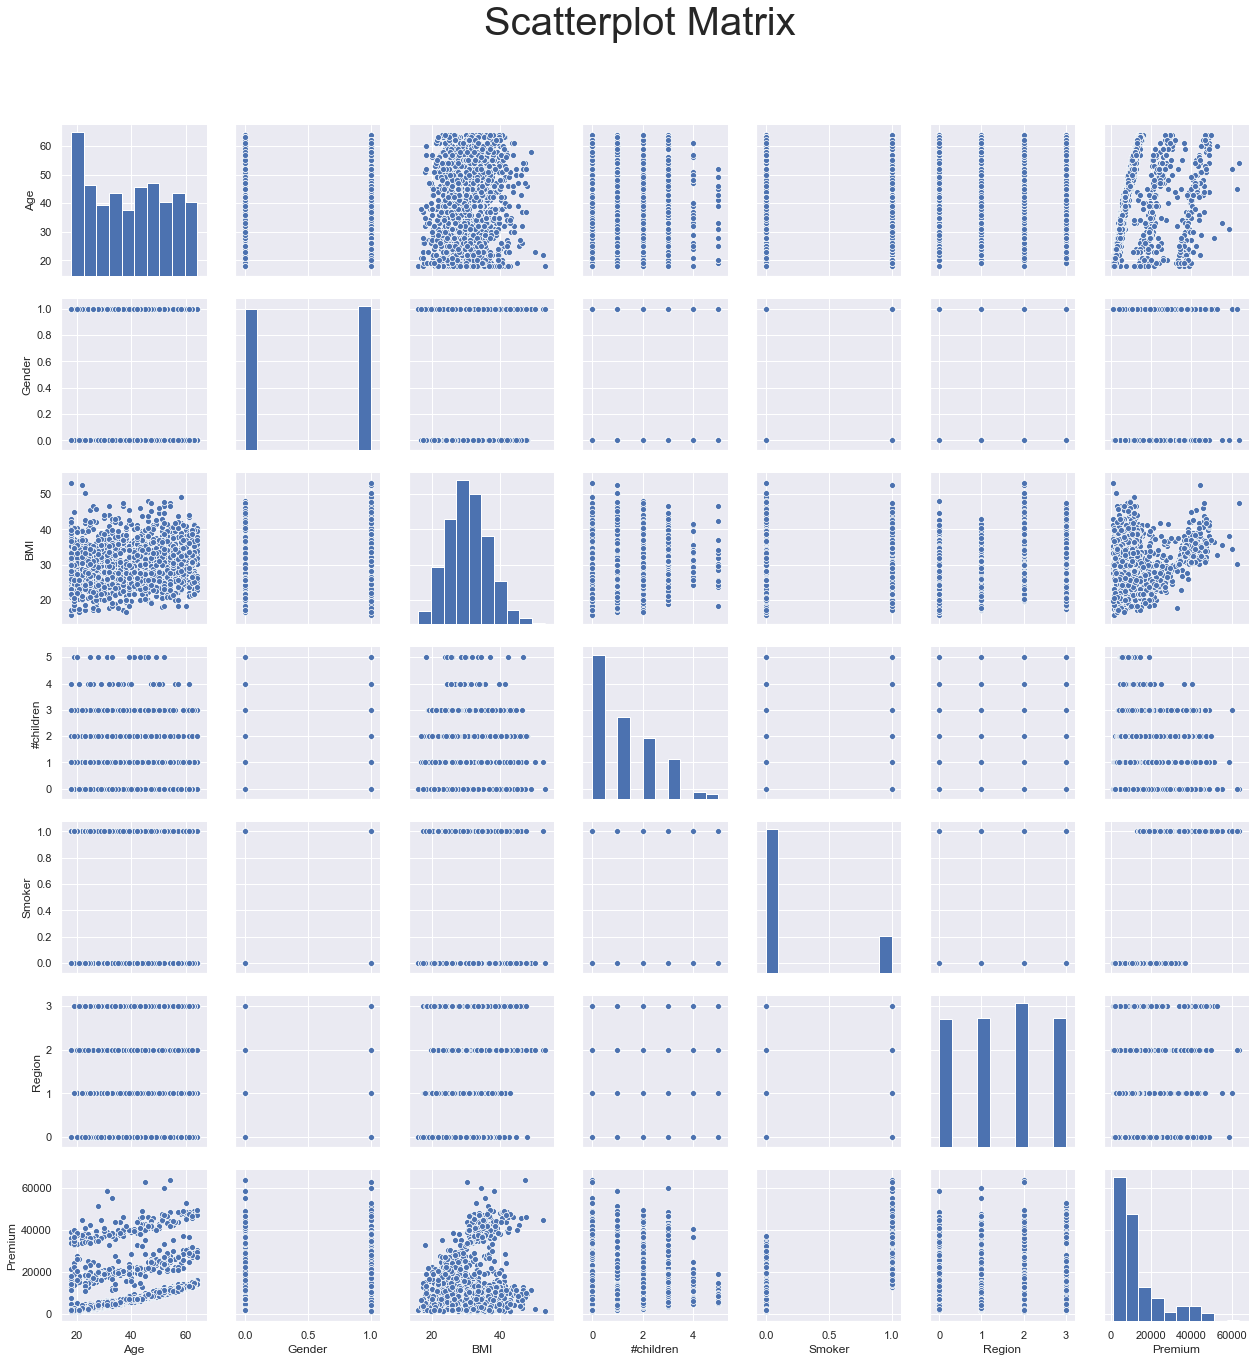

In [53]:
pl= sns.pairplot(df)
pl.fig.suptitle("Scatterplot Matrix", y=1.08, fontsize=40) 

## 3. Statistical Analysis and Modelling

<div class="alert alert-block alert-info">Python is one of the most widely used languages in statistical modelling in data science and machine learning:

- It is open-source nature 
- Active online community
- Intuitive syntax
- Large collection of standardized libraries
</div>

### 3.1 Linear Regression

With the Python library <b>scikit-learn</b>, we can easliy fit a linear regression model 

<div class="alert alert-block alert-info"><b>Regression Equation</b> <br>
𝑦 = 𝛽₀ + 𝛽₁𝑥₁ + ⋯ + 𝛽ᵣ𝑥ᵣ + 𝜀 <div>

<b>Steps</b>
1. Handling of the nominal categorical variables- apply label encoding*  
2. Split the data into a "train" and "test" set
3. Fit regression model and caluclate model statistics 
4. Check accuracy of the model on "test" set

**Each category is assigned a value from 1 through n. n is the number of categories for the variable. There is no relation or order in the assingned value.*

In [38]:
#Loading required libraries 
import numpy as np #mathematical functions
from sklearn.model_selection import train_test_split #for splitting the data into train and test set 
import statsmodels.api as sm #for fitting the linear regression
import matplotlib.pyplot as plt #for plots 
from sklearn.preprocessing import LabelEncoder #for label encoding

#### 1. Label Encoding

In [40]:
label = LabelEncoder()
label.fit(df.Gender.drop_duplicates())
df.Gender = label.transform(df.Gender)
label.fit(df.Smoker.drop_duplicates())
df.Smoker = label.transform(df.Smoker)
label.fit(df.Region.drop_duplicates())
df.Region = label.transform(df.Region)
df.dtypes

Age            int64
Gender         int64
BMI          float64
#children      int64
Smoker         int64
Region         int64
Premium        int64
dtype: object

In [41]:
df.head(10)

Age  Gender     BMI  #children  Smoker  Region  Premium
0   19       0  27.900          0       1       3    16885
1   18       1  33.770          1       0       2     1726
2   28       1  33.000          3       0       2     4449
3   33       1  22.705          0       0       1    21984
4   32       1  28.880          0       0       1     3867
5   31       0  25.740          0       0       2     3757
6   46       0  33.440          1       0       2     8241
7   37       0  27.740          3       0       1     7282
8   37       1  29.830          2       0       0     6406
9   60       0  25.840          0       0       1    28923

In [ ]:
#Correlation Matrix
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

"Smoker" has a strong correlation with "Premium"


#### 2. Split the data into train and test set 

In [46]:
#define response variable
y = df['Premium']

#define predictor variables
x = df.drop(['Premium'], axis = 1)

#Split the data into train and test set
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size=0.3, random_state=3)

#add constant to predictor variables
x_train = sm.add_constant(x_train)

#### 3.Fit regression model and caluclate model statistics

In [47]:
#add constant to predictor variables
x_train = sm.add_constant(x_train)

#fit linear regression model
model = sm.OLS(y_train, x_train).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Premium   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     483.9
Date:                Sun, 11 Sep 2022   Prob (F-statistic):          8.45e-282
Time:                        00:30:47   Log-Likelihood:                -9472.1
No. Observations:                 936   AIC:                         1.896e+04
Df Residuals:                     929   BIC:                         1.899e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.235e+04   1136.222    -10.867      0.0

76% of dependent variability can be explained by the model, and adjusted R Square is roughly the same as R Square meaning the model is quite robust.

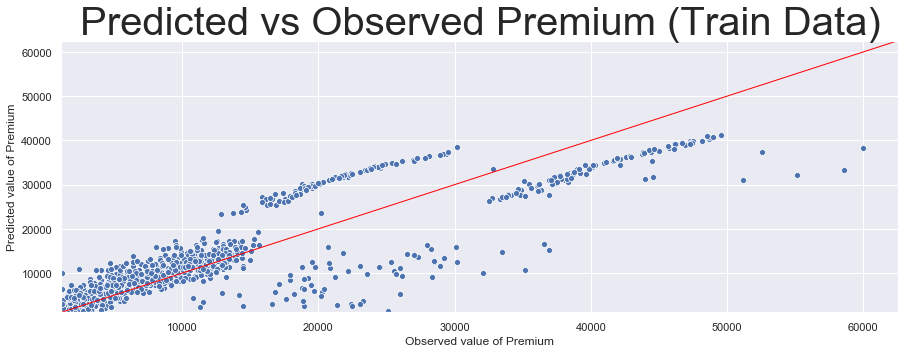

In [56]:
#Assesing the model fit
y_pred = model.predict(x_train) #fit the model on the train data
Y_max = y_test.max()
Y_min = y_test.min()

ax = sns.scatterplot(x=y_train, y=y_pred)
ax.set(ylim=(Y_min, Y_max))
ax.set(xlim=(Y_min, Y_max))
ax.set_xlabel("Observed value of Premium")
ax.set_ylabel("Predicted value of Premium")

X_ref = Y_ref = np.linspace(Y_min, Y_max, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.title("Predicted vs Observed Premium (Train Data)",fontsize=40)
plt.show()

For lower Premium values, the model provides a good fit. `

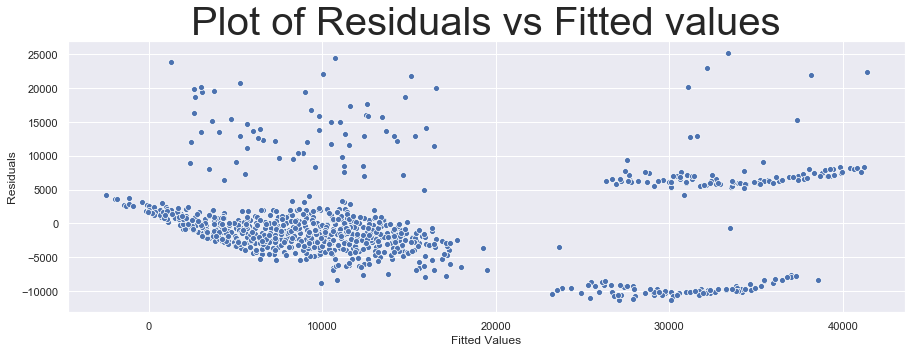

In [49]:
#Plot of Residuals vs Fitted values 
residuals = y_train - y_pred
pl = sns.scatterplot(x=y_pred, y=residuals)
pl.set_xlabel("Fitted Values")
pl.set_ylabel("Residuals")
plt.title("Plot of Residuals vs Fitted values",fontsize=40)
plt.show()

Ideally, the residual plot should show no apparent pattern. There appears to be little pattern in the residuals. 

#### 4. Check the accuracy of the model on the "test" dataset

In [58]:
x_test = sm.add_constant(x_test)
y_test_pred = model.predict(x_test)

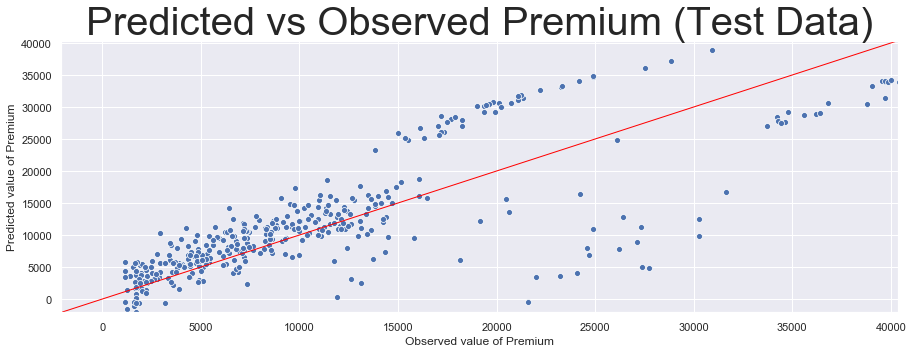

In [59]:
#Assesing the model fit on the test data 
Y_max = y_test_pred.max()
Y_min = y_test_pred.min()

ax = sns.scatterplot(x=y_test, y=y_test_pred)
ax.set(ylim=(Y_min, Y_max))
ax.set(xlim=(Y_min, Y_max))
ax.set_xlabel("Observed value of Premium")
ax.set_ylabel("Predicted value of Premium")

X_ref = Y_ref = np.linspace(Y_min, Y_max, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.title("Predicted vs Observed Premium (Test Data)",fontsize=40)
plt.show()

Others measures of assesing model fit 

In [62]:
from sklearn.metrics import mean_squared_error
import math
print("MSE:",mean_squared_error(y_test, y_test_pred))
print("RMSE:",math.sqrt(mean_squared_error(y_test, y_test_pred)))

MSE: 37740888.54022848
RMSE: 6143.361338894895


The fit has room for further improvement - interaction terms can be added, handling high Premium outliers, tranforming variables, etc. 

We can also applying more sopisticated modelling approaches- Ridge regression, regression trees, etc., libraries for which are available in Python and are open source! 

The capabilities of the Jupyter notebooks extend much beyond performing a regression analysis. It has powerful statistical modelling and machine learning libraries, with plenty of great online resources and a very active community.

# Thank you! 
